In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread("./happy_cat.png")
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(512, 512, 3)


In [35]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

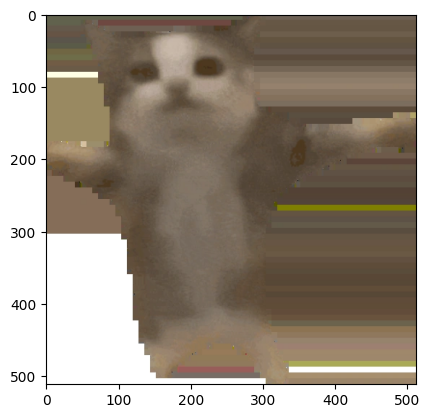

In [4]:
plt.imshow(img)
plt.show()

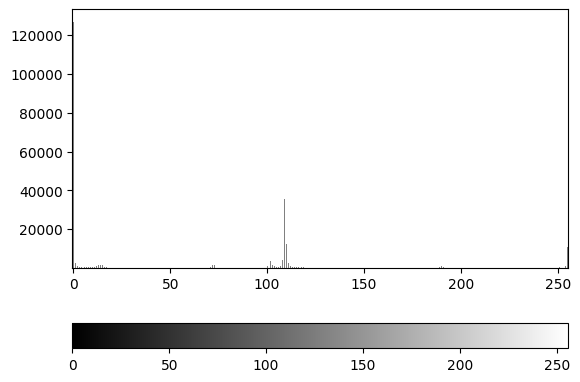

In [123]:
gradient = np.linspace(0, 256, 256).reshape(1, -1)

# plt.plot(hist)
plt.imshow(gradient, cmap="gray", aspect='auto')
cbar = plt.colorbar(orientation='horizontal')
# plt.hist(img.ravel(), 256, [0, 256], False, histtype="bar", color="gray", rwidth=0.8)
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
plt.bar(range(256), hist, color="gray", width=0.5)

# 反转y轴方向
plt.gca().invert_yaxis()

plt.show()

True

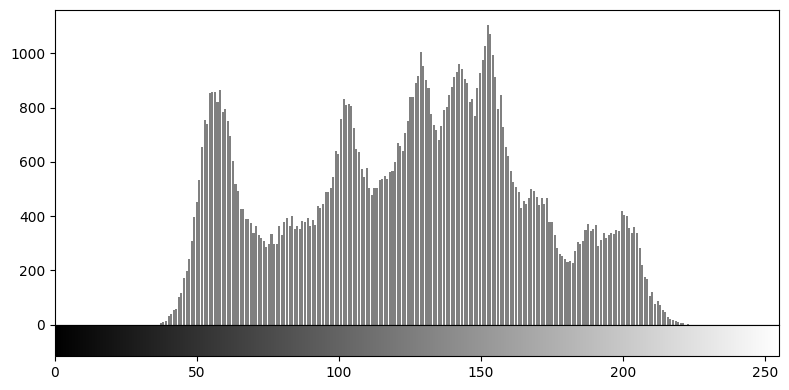

In [121]:
from matplotlib.gridspec import GridSpec
from matplotlib.backends.backend_agg import FigureCanvasAgg
gradient = np.linspace(0, 256, 256).reshape(1, -1)

# 创建Figure和包含两个子图的网格
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 1, height_ratios=[10, 1], hspace=0)

# 第一个子图：直方图
ax0 = plt.subplot(gs[0])
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
ax0.bar(range(256), hist, color="gray", width=0.8)

# 第二个子图：colorbar
ax1 = plt.subplot(gs[1])
plt.imshow(gradient, cmap="gray", aspect='auto')
cbar = plt.colorbar(orientation='horizontal', cax=ax1)
# ax0.set_xlim(0, 255)
# ax1.set_xlim(0, 255)

# 反转y轴方向
# ax0.invert_yaxis()

# 共用下面x轴的刻度
plt.xticks(ax0.get_xticks())
plt.xlim(0, 255)

# 调整子图位置和大小，让colorbar紧贴下边
plt.tight_layout()

# 显示图形
# plt.show()

canvas = FigureCanvasAgg(fig)
canvas.draw()  # Draw the canvas, cache the renderer

image_flat = np.frombuffer(canvas.tostring_argb(), dtype='uint8')  # (H * W * 3,)
# NOTE: reversed converts (W, H) from get_width_height to (H, W)

image = image_flat.reshape(*reversed(canvas.get_width_height()), 4)  # (H, W, 3)
# image = image_flat.reshape(canvas.get_width_height()[::-1] + (4,))  # (H, W, 3)
bgr_image = image[:, :, ::-1]
bgr_image = bgr_image[:, :, :3]

# 将通道顺序从RGB更改为BGR

# plt.imshow(image)
# plt.show()
cv2.imwrite("output.png", bgr_image)

In [ ]:
cv2.imwrite("gray_Lenna.png", img)

True

In [10]:

import numpy as np
import cv2

fname = './中文測試/gray_Lenna.png'
fname = './中文測試/pepega.png'
img = cv2.imdecode(np.fromfile(fname,dtype=np.uint8),-1)
print(img.shape)
# if img is not None:
#     # Get the number of channels
#     if len(img.shape) == 3
#     num_channels = img.shape[2]  # Third dimension of the shape tuple

#     if num_channels == 3:
#         print("Image has 3 channels (RGB)")
#     elif num_channels == 4:
#         print("Image has 4 channels (RGBA)")
#     elif num_channels == 1:
#         print("Image is grayscale")
#     else:
#         print(f"Image has {num_channels} channels")
# else:
#     print("Failed to load the image")

(400, 600, 4)


In [11]:
if img is not None:
    # Specify the rotation angle in degrees
    angle = 180  # Example: Rotate 90 degrees
    # print(image.shape)
    # print(image.cols)
    # print(image.rows)
    # Get the image dimensions
    height, width = img.shape[:2]
    print(img.shape)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

(400, 600, 4)


In [ ]:
import cv2
import numpy as np

# Load the original images
jpeg_image = cv2.imread("./中文測試/Lenna.jpg")
png_image = cv2.imread("./中文測試/pepega.jpg", cv2.IMREAD_UNCHANGED)  # Preserve alpha channel
gray_image = cv2.imread("./中文測試/gray_Lenna.jpg", cv2.IMREAD_GRAYSCALE)

# Encode the images in PPM format
ret, jpeg_encoded = cv2.imencode(".ppm", jpeg_image)
ret, png_encoded = cv2.imencode(".ppm", png_image)
ret, gray_encoded = cv2.imencode(".ppm", gray_image)

# Save the encoded PPM images to files
if ret:
    with open("output_jpeg.ppm", "wb") as f:
        f.write(jpeg_encoded.tobytes())

    with open("output_png.ppm", "wb") as f:
        f.write(png_encoded.tobytes())

    with open("output_gray.ppm", "wb") as f:
        f.write(gray_encoded.tobytes())
else:
    print("Error encoding images")

print("Images encoded and saved as PPM files.")


C:\Users\kizato\AppData\Local\Temp\ipykernel_28092\29348710.py:15: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')  # (H * W * 3,)


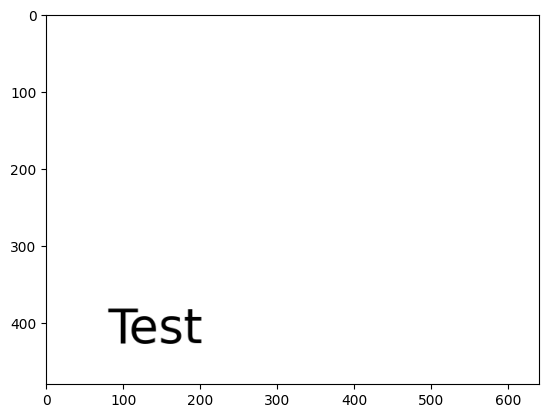

In [24]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg
import matplotlib.pyplot as plt
import numpy as np

fig = Figure()
canvas = FigureCanvasAgg(fig)
ax = fig.gca()

ax.text(0.0,0.0,"Test", fontsize=45)
ax.axis('off')

canvas.draw()  # Draw the canvas, cache the renderer

image_flat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')  # (H * W * 3,)
# NOTE: reversed converts (W, H) from get_width_height to (H, W)
image = image_flat.reshape(*reversed(canvas.get_width_height()), 3)  # (H, W, 3)

plt.imshow(image)
plt.show()

In [5]:
cv2.imwrite("black.png", np.zeros((256, 256, 3), dtype='uint8'))
cv2.imwrite("white.png", np.ones((256, 256, 3), dtype='uint8')*255)

True